### Bayesian Data Analysis, 3rd ed
##  Chapter 6, demo 3

Posterior predictive checking  
Light speed example with a poorly chosen test statistic

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
my = np.mean(y)

In [5]:
# A second example of replications
nsamp = 1000
pps = np.random.standard_t(n-1, size=(n,nsamp))*np.sqrt(s2*(1+1/n)) + my
# Use the sample variance as a test statistic
# This is a poor choice since it corresponds directly to
# the variance parameter in the model which has been fitted
# to the data.
pp = np.var(pps, axis=0, ddof=1)

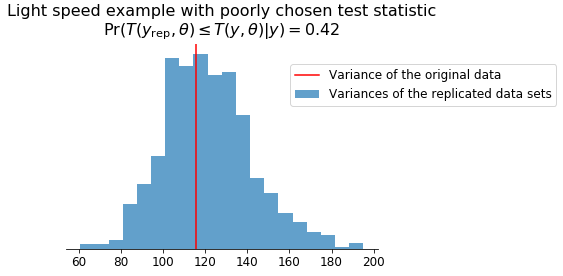

In [6]:
# plot
plt.hist(
    pp,
    20,
    label='Variances of the replicated data sets',
    color=plot_tools.lighten('C0', 0.3)
)
plt.axvline(s2, color='red', label='Variance of the original data')
plt.title(
    'Light speed example with poorly chosen test statistic\n'
    r'$\operatorname{Pr}(T(y_\mathrm{rep},\theta)\leq T(y,\theta)|y)=0.42$',
    fontsize=16
)
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.8))
plot_tools.modify_axes.only_x(plt.gca())
plt.tight_layout()